In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image


In [5]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
type(X_train)

numpy.ndarray

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training data =60000 images   ,,,,     Test data=10000 images

image dimension=28X28        ,,,,,     All are grayscale images only 1 channel is there

In [9]:
#printing the 50th image from x train
print(X_train[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

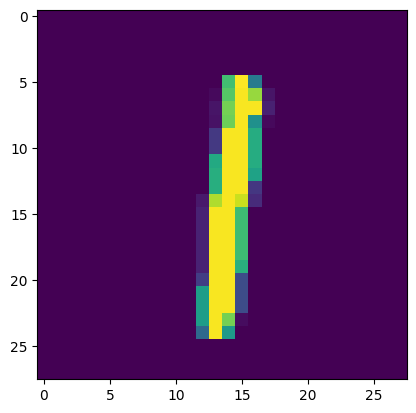

1


In [10]:
plt.imshow(X_train[40])
plt.show()
# printing the coresponding label also
print(y_train[40])

In [11]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


Scaling the values/Normalization
Making all the values that are between 0 and 255 to making them lie between 0 nad 1 so that the machine could easily undertand

In [12]:
X_train=X_train/255
X_test=X_test/255

Building the Neural Networks

In [13]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the model

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [15]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8569 - loss: 0.5220
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9515 - loss: 0.1671
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9652 - loss: 0.1192
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0930
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0762
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9817 - loss: 0.0641
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9846 - loss: 0.0552
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9870 - loss: 0.0474
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0411
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9905 - loss: 0.0358


Training data accuracy is 98.8%

In [16]:
loss,accuracy=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9686 - loss: 0.1129


Accuracy for test data is 97 which is great

In [17]:
print(accuracy)

0.9718999862670898


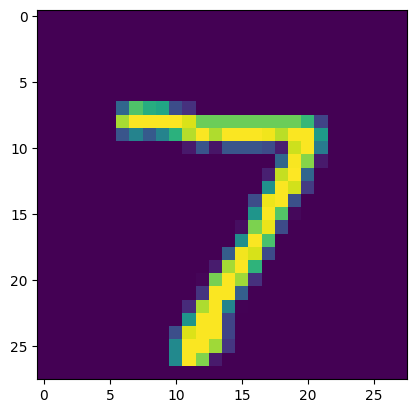

In [18]:
plt.imshow(X_test[0])
plt.show()

In [19]:
print(y_test[0])

7


In [20]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


It will give 10 probability for each value fro 0 to 9

In [21]:
print(y_pred.shape)

(10000, 10)


In [22]:
print(y_pred[0])

[5.6520673e-03 2.2617705e-07 6.2498254e-01 9.9631828e-01 4.4284034e-06
 1.7373158e-02 2.5882652e-09 9.9999911e-01 4.5100918e-01 8.8140619e-01]


Converting these probability values into true values or Labels

In [23]:
label_for_first_test_image=np.argmax(y_pred[0])

In [24]:
print(label_for_first_test_image)

7


Doing it for all values of y_pred

In [25]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 3, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Building the confusion matrix

In [26]:
conf=confusion_matrix(y_test,y_pred_labels)
print(conf)

tf.Tensor(
[[ 962    0    3    2    1    1    5    3    1    2]
 [   0 1121    4    1    0    1    3    1    4    0]
 [   6    1  994    6    4    0    3    8    7    3]
 [   0    0    4  987    1    1    0    6    5    6]
 [   1    0    4    0  960    1    5    4    1    6]
 [   4    0    0   13    2  850    6    2    9    6]
 [   4    2    2    1    3    3  942    0    1    0]
 [   2    5    8    3    3    0    0  996    1   10]
 [   3    1    3   13    2    3    3    3  938    5]
 [   1    4    0    6   21    0    0    5    4  968]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

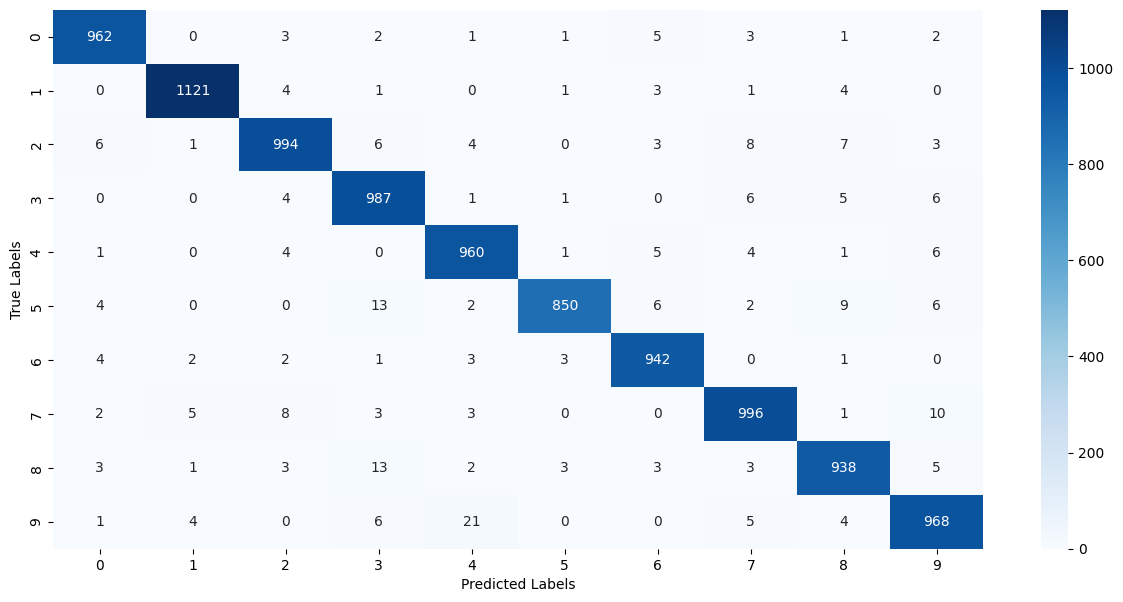

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Preictive system

In [39]:
input_imag_path='/content/3.png'
input_image=cv2.imread(input_imag_path)
type(input_image)

numpy.ndarray

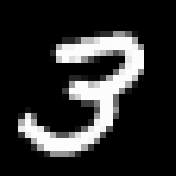

In [40]:
cv2_imshow(input_image)

In [41]:
input_image.shape

(176, 176, 3)

This image is an RGB image so we have to convert it into a grayscale image

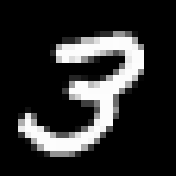

In [42]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

Converted to grayscale image

In [43]:
grayscale.shape

(176, 176)

Resizing the image to 28,28

In [44]:
image_resize=cv2.resize(grayscale,(28,28))
cv2_imshow(image_resize)

In [45]:
image_resize.shape

(28, 28)

In [46]:
input_image=image_resize/255

In [47]:
image_reshaped=np.reshape(input_image,[1,28,28])


In [48]:
input_pred=model.predict(image_reshaped)
print(input_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[5.3758575e-10 9.1174610e-05 7.8626042e-03 1.0000000e+00 2.0901824e-11
  5.3569414e-02 1.6774927e-14 2.1380870e-02 2.4865367e-01 9.4227022e-01]]


In [49]:
input_pred_label=np.argmax(input_pred)
print(input_pred_label)

3


So the model has correctly predictd the value as 3